# A/B_TESTING:  Pricing Test 
## Pricing Test 
### Goal 
Pricing optimization is, non surprisingly, another area where data science can provide huge value.  

The goal here is to evaluate whether a pricing test running on the site has been successful. As always, you should focus on user segmentation and provide insights about segments who behave differently as well as any other insights you might ﬁnd.

## Challenge Description

Company XYZ sells a software for \$39. Since revenue has been ﬂat for some time, the VP of Product has decided to run a test increasing the price. She hopes that this would increase revenue. In the experiment, 66% of the users have seen the old price (\$39), while a random sample of 33% users a higher price (\$59). 

The test has been running for some time and the VP of Product is interested in understanding how it went and whether it would make sense to increase the price for all the users. Especially, you were asked the following questions: 
+ Should the company sell its software for __\$39 or \$59__?
+ The VP of Product is interested in having __a holistic view into user behavior__, especially focusing on __actionable insights__ that might increase conversion rate. What are your main ﬁndings looking at the data? 
+ [Bonus] The VP of Product feels that the test has been running for too long and they should have been able to get statistically signiﬁcant results in a shorter time. Do you agree with this? After __how many days__ you would have stopped the test? Please, explain why. 

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import os

# cwd = os.getcwd()
# os.listdir(cwd + '\\')

In [2]:
os.getcwd()

'C:\\Users\\taore\\Documents\\DL_ML_AI_DS\\Take-Home Challenge'

In [3]:
os.listdir(os.getcwd() + '\\Data\\Pricing_Test')

['test_results.csv', 'user_table.csv']

## import data

In [4]:
test = pd.read_csv('.\\Data\\Pricing_Test\\' + 'test_results.csv')
user = pd.read_csv('.\\Data\\Pricing_Test\\' + 'user_table.csv')

In [5]:
test.head(10)

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0
5,169971,2015-04-13 12:07:08,ads-google,mobile,iOS,0,39,0
6,600150,2015-03-04 14:45:44,seo_facebook,web,windows,0,39,0
7,798371,2015-03-15 08:19:29,ads-bing,mobile,android,1,59,1
8,447194,2015-03-28 12:28:10,ads_facebook,web,windows,1,59,0
9,431639,2015-04-24 12:42:18,ads_facebook,web,windows,1,59,0


what data is in the test file?  
+ user_id: Check if user_id values are unique in the column or not.
+ timestamp: Time infomaiton. we can check the time period of the test. we can calculate the user visiting rate every day. (total number of visitors / total days).
+ source, device, operative_system: these are characteristics / features of the user who visit the software website.
+ test / price: take similar information, 0->39 and 1->59. we can check if this is true.
+ converted: whether a user make a purchase or not. Since we care more about final revenue, it would be better to use the money paid by one user.

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
user_id             316800 non-null int64
timestamp           316800 non-null object
source              316800 non-null object
device              316800 non-null object
operative_system    316800 non-null object
test                316800 non-null int64
price               316800 non-null int64
converted           316800 non-null int64
dtypes: int64(4), object(4)
memory usage: 19.3+ MB


In [7]:
test['timestamp'] = test['timestamp'].apply(lambda x: x[:10])
test['timestamp'] = pd.to_datetime(test['timestamp'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
user_id             316800 non-null int64
timestamp           316800 non-null datetime64[ns]
source              316800 non-null object
device              316800 non-null object
operative_system    316800 non-null object
test                316800 non-null int64
price               316800 non-null int64
converted           316800 non-null int64
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 19.3+ MB


In [8]:
test['user_id'].nunique()

316800

In [9]:
len(test['user_id']), len(test['user_id'].unique())

(316800, 316800)

In [10]:
user.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [11]:
user['country'].nunique(), user['city'].nunique()

(1, 923)

In [12]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
user_id    275616 non-null int64
city       275616 non-null object
country    275616 non-null object
lat        275616 non-null float64
long       275616 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [13]:
user['user_id'].nunique()

275616

In [14]:
test_user_set = set(test['user_id'])
old_user_set = set(user['user_id'])
len(test_user_set.intersection(old_user_set))

275616

### unique users in the test dataset are more than those in the user dataset.
+ This indicates the user dataset doesn't record and contain all the user information.
+ But the users in the user dataset have records in the test dataset.

Here we use the describe function to investigate the general data information.

One thing we can check here is that whether there are any obvious mistakes.

For example, whether there are NAN values, or whether the categorical data has its right label. 

In more detail, 

whether the test column contains only 0 and 1.

whether the price column contains only 39 and 59.

whether the converted column contains only 0 and 1.

If two columns are relevant, check if the connection is appropriate.

For instance, 0 in the test column should correspond to 39 in the price column.

### After you find something, convert the number information into graphs for visulization.

In [15]:
test.describe(include='all')

,user_id,timestamp,source,device,operative_system,test,price,converted
count,316800.000000,316800,316800,316800,316800,316800.000000,316800.000000,316800.000000
unique,NaN,91,12,2,6,NaN,NaN,NaN
top,NaN,2015-03-20 00:00:00,direct_traffic,mobile,windows,NaN,NaN,NaN
freq,NaN,7253,60357,186471,100976,NaN,NaN,NaN
first,NaN,2015-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,499281.341840,NaN,NaN,NaN,NaN,0.360079,46.205051,0.018333
std,288591.154044,NaN,NaN,NaN,NaN,0.480024,9.601487,0.134154
min,3.000000,NaN,NaN,NaN,NaN,0.000000,39.000000,0.000000
25%,249525.750000,NaN,NaN,NaN,NaN,0.000000,39.000000,0.000000


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
user_id             316800 non-null int64
timestamp           316800 non-null datetime64[ns]
source              316800 non-null object
device              316800 non-null object
operative_system    316800 non-null object
test                316800 non-null int64
price               316800 non-null int64
converted           316800 non-null int64
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 19.3+ MB


In [17]:
test.isnull().sum()

user_id             0
timestamp           0
source              0
device              0
operative_system    0
test                0
price               0
converted           0
dtype: int64

There is no missing data.

## Exam each column

In [18]:
test.groupby(['source']).size()

source
ads-bing           22873
ads-google         59379
ads-yahoo           7583
ads_facebook       53396
ads_other          29876
direct_traffic     60357
friend_referral    20695
seo-bing            2153
seo-google         23175
seo-other           9260
seo-yahoo           6848
seo_facebook       21205
dtype: int64

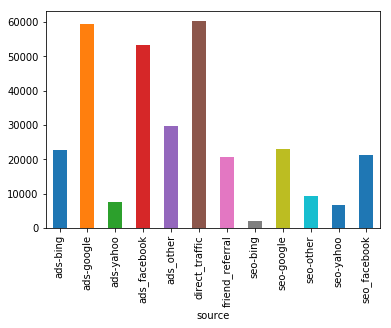

In [19]:
test.groupby(['source']).size().plot(kind='bar')

In [20]:
test.groupby(['device']).size()

device
mobile    186471
web       130329
dtype: int64

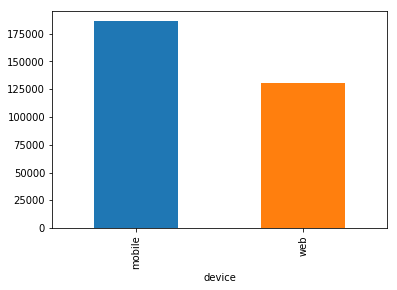

In [21]:
test.groupby(['device']).size().plot(kind='bar')

In [22]:
test.groupby(['operative_system']).size()

operative_system
android     74935
iOS         95465
linux        4135
mac         25085
other       16204
windows    100976
dtype: int64

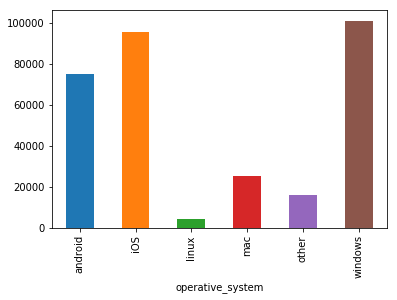

In [23]:
test.groupby(['operative_system']).size().plot(kind='bar')

In [24]:
test.groupby(['test']).size()

test
0    202727
1    114073
dtype: int64

In [25]:
test.groupby(['test']).size() / len(test)

test
0    0.639921
1    0.360079
dtype: float64

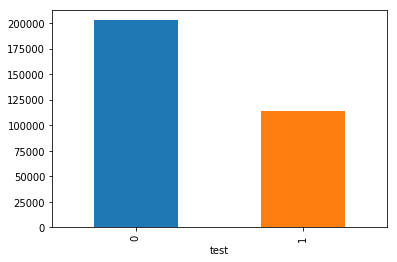

In [26]:
test.groupby(['test']).size().plot(kind='bar')

In [27]:
test.groupby(['price']).size()

price
39    202672
59    114128
dtype: int64

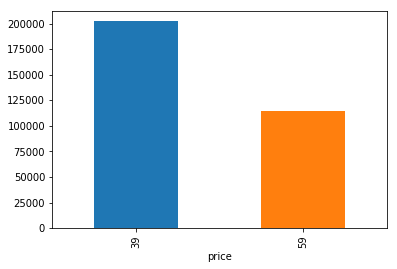

In [28]:
test.groupby(['price']).size().plot(kind='bar')

In [29]:
test.groupby(['converted']).size()

converted
0    310992
1      5808
dtype: int64

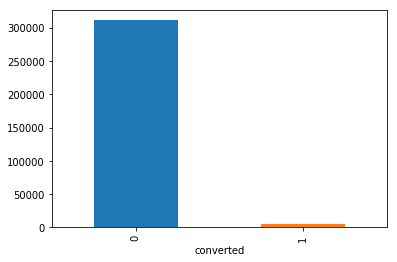

In [30]:
test.groupby(['converted']).size().plot(kind='bar')

## spliting data into control and test groups

In [31]:
test0 = test[test['test'] == 0]
test1 = test[test['test'] == 1]

### control group

In [32]:
test0.describe(include='all')

,user_id,timestamp,source,device,operative_system,test,price,converted
count,202727.000000,202727,202727,202727,202727,202727.0,202727.000000,202727.000000
unique,NaN,91,12,2,6,NaN,NaN,NaN
top,NaN,2015-05-15 00:00:00,direct_traffic,mobile,windows,NaN,NaN,NaN
freq,NaN,4770,38759,120481,63591,NaN,NaN,NaN
first,NaN,2015-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,499167.741613,NaN,NaN,NaN,NaN,0.0,39.020718,0.019904
std,288616.565865,NaN,NaN,NaN,NaN,0.0,0.643369,0.139669
min,9.000000,NaN,NaN,NaN,NaN,0.0,39.000000,0.000000
25%,249557.000000,NaN,NaN,NaN,NaN,0.0,39.000000,0.000000


The price for the controlled group is 39, and 59 for the test group.

Ooops, however, we find that there are several 59s in the controlled group. This may indicate some problems / mistakes could happen. This could be software problem / logging problem / reading problem.

Other data looks ok.

In [33]:
test0.groupby('price').size() / len(test0)

price
39    0.998964
59    0.001036
dtype: float64

the portion of miss labeled data is relatively small. I will discard them later.

In [34]:
test0[test0['price'] == 59].head()

,user_id,timestamp,source,device,operative_system,test,price,converted
8238,500863,2015-05-06,ads_other,mobile,iOS,0,59,0
8369,791541,2015-04-13,ads-bing,web,windows,0,59,0
11555,402699,2015-05-16,direct_traffic,mobile,other,0,59,0
12848,624380,2015-05-22,seo-google,mobile,iOS,0,59,0
14630,577544,2015-04-24,seo-google,mobile,android,0,59,0


In [35]:
test39 = test0[test0['price'] == 39]

In [36]:
test39.describe(include='all')

,user_id,timestamp,source,device,operative_system,test,price,converted
count,202517.000000,202517,202517,202517,202517,202517.0,202517.0,202517.000000
unique,NaN,91,12,2,6,NaN,NaN,NaN
top,NaN,2015-05-15 00:00:00,direct_traffic,mobile,windows,NaN,NaN,NaN
freq,NaN,4770,38712,120369,63517,NaN,NaN,NaN
first,NaN,2015-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,499177.321889,NaN,NaN,NaN,NaN,0.0,39.0,0.019900
std,288614.108986,NaN,NaN,NaN,NaN,0.0,0.0,0.139656
min,9.000000,NaN,NaN,NaN,NaN,0.0,39.0,0.000000
25%,249556.000000,NaN,NaN,NaN,NaN,0.0,39.0,0.000000


### test group

In [37]:
test1.describe(include='all')

,user_id,timestamp,source,device,operative_system,test,price,converted
count,114073.000000,114073,114073,114073,114073,114073.0,114073.000000,114073.000000
unique,NaN,91,12,2,6,NaN,NaN,NaN
top,NaN,2015-03-27 00:00:00,direct_traffic,mobile,windows,NaN,NaN,NaN
freq,NaN,2732,21598,65990,37385,NaN,NaN,NaN
first,NaN,2015-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,499483.228643,NaN,NaN,NaN,NaN,1.0,58.972824,0.015543
std,288547.142025,NaN,NaN,NaN,NaN,0.0,0.736735,0.123698
min,3.000000,NaN,NaN,NaN,NaN,1.0,39.000000,0.000000
25%,249460.000000,NaN,NaN,NaN,NaN,1.0,59.000000,0.000000


similarly, in the test group, there are 39s in the data.  This again may indicate some problems / mistakes could happen. This could be software problem / logging problem / reading problem.

Other data looks ok.

In [38]:
test1.groupby(['price']).size() / len(test1)

price
39    0.001359
59    0.998641
dtype: float64

Again, the portion of miss labeled data is small.

In [39]:
test59 = test1[test1['price'] == 59]

In [40]:
test59.describe(include='all')

,user_id,timestamp,source,device,operative_system,test,price,converted
count,113918.000000,113918,113918,113918,113918,113918.0,113918.0,113918.000000
unique,NaN,91,12,2,6,NaN,NaN,NaN
top,NaN,2015-03-27 00:00:00,direct_traffic,mobile,windows,NaN,NaN,NaN
freq,NaN,2722,21560,65898,37333,NaN,NaN,NaN
first,NaN,2015-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,499547.052634,NaN,NaN,NaN,NaN,1.0,59.0,0.015555
std,288556.714324,NaN,NaN,NaN,NaN,0.0,0.0,0.123747
min,3.000000,NaN,NaN,NaN,NaN,1.0,59.0,0.000000
25%,249527.000000,NaN,NaN,NaN,NaN,1.0,59.0,0.000000


Now use new datasets: test39 and test59

In [41]:
test39.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10,seo-google,mobile,android,0,39,0
2,317970,2015-04-04,ads-bing,mobile,android,0,39,0
4,820854,2015-05-24,ads_facebook,web,mac,0,39,0
5,169971,2015-04-13,ads-google,mobile,iOS,0,39,0


In [42]:
test59.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
3,685636,2015-05-07,direct_traffic,mobile,iOS,1,59,0
7,798371,2015-03-15,ads-bing,mobile,android,1,59,1
8,447194,2015-03-28,ads_facebook,web,windows,1,59,0
9,431639,2015-04-24,ads_facebook,web,windows,1,59,0
15,552048,2015-03-22,ads-bing,web,windows,1,59,0


In [43]:
test39.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202517 entries, 0 to 316798
Data columns (total 8 columns):
user_id             202517 non-null int64
timestamp           202517 non-null datetime64[ns]
source              202517 non-null object
device              202517 non-null object
operative_system    202517 non-null object
test                202517 non-null int64
price               202517 non-null int64
converted           202517 non-null int64
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 13.9+ MB


In [44]:
test59.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113918 entries, 3 to 316799
Data columns (total 8 columns):
user_id             113918 non-null int64
timestamp           113918 non-null datetime64[ns]
source              113918 non-null object
device              113918 non-null object
operative_system    113918 non-null object
test                113918 non-null int64
price               113918 non-null int64
converted           113918 non-null int64
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 7.8+ MB


In [45]:
test_new = test39.append(test59)

In [46]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316435 entries, 0 to 316799
Data columns (total 8 columns):
user_id             316435 non-null int64
timestamp           316435 non-null datetime64[ns]
source              316435 non-null object
device              316435 non-null object
operative_system    316435 non-null object
test                316435 non-null int64
price               316435 non-null int64
converted           316435 non-null int64
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 21.7+ MB


In [47]:
test_new.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10,seo-google,mobile,android,0,39,0
2,317970,2015-04-04,ads-bing,mobile,android,0,39,0
4,820854,2015-05-24,ads_facebook,web,mac,0,39,0
5,169971,2015-04-13,ads-google,mobile,iOS,0,39,0


In [48]:
len(test39) / len(test_new), len(test59) / len(test_new)

(0.6399955757106515, 0.36000442428934853)

Proportions of the control and test groups in the whole population.  
control: 0.64  
test: 0.36  
This is slightly different from the number in the description, i.e. 0.66 for control and 0.33 for test.

## Combine with user information

In [49]:
test_user = test_new.merge(user, how='left', on='user_id')
test_user.head(10)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,820854,2015-05-24,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02
4,169971,2015-04-13,ads-google,mobile,iOS,0,39,0,New York,USA,40.67,-73.94
5,600150,2015-03-04,seo_facebook,web,windows,0,39,0,NaN,NaN,NaN,NaN
6,590182,2015-04-17,ads-google,web,windows,0,39,0,Bloomfield Township,USA,42.58,-83.27
7,606479,2015-05-15,direct_traffic,web,mac,0,39,0,Des Plaines,USA,42.03,-87.90
8,425567,2015-04-24,ads_facebook,web,windows,0,39,0,NaN,NaN,NaN,NaN
9,460593,2015-03-21,friend_referral,mobile,iOS,0,39,1,Hampton,USA,37.05,-76.29


As expected, some users' information is missing.

Before analyzing A/B testing result, we check the randomness of the control and test group.  

### user segmentations: 'source', 'device', 'operative_system'

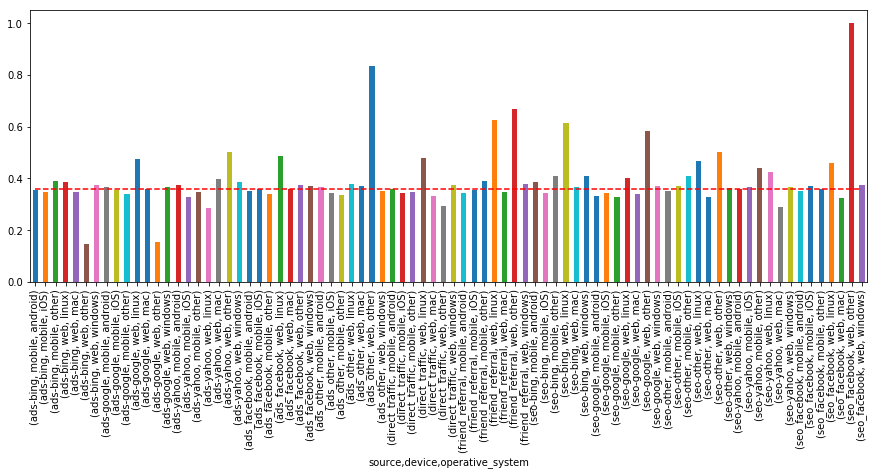

In [50]:
random_test = test_user.groupby(['source', 'device', 'operative_system'])['test'].mean()
random_test.plot(kind='bar', figsize=(15,5))
plt.plot([0.36]*len(random_test), '--r')

there are some subgroups having significant higher or lower proportions for their test parts.

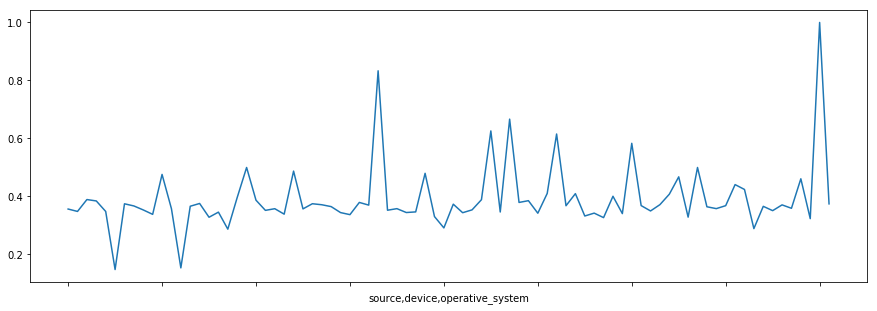

In [97]:
random_test = test_user.groupby(['source', 'device', 'operative_system'])['test'].mean()
random_test.plot(kind='line', figsize=(15,5))

from the line plot, we can see the extreme values more clear.

In [52]:
random_test = test_user.groupby(['source', 'device', 'operative_system'])['test'].agg(['mean','size'])
random_test

mean   size
source       device operative_system                 
ads-bing     mobile android           0.356718   5374
                    iOS               0.348487   6907
                    other             0.389431   1230
             web    linux             0.384615    247
                    mac               0.348406   1725
                    other             0.148148     27
                    windows           0.374812   7321
ads-google   mobile android           0.367394  13887
                    iOS               0.353616  18144
                    other             0.338375   2843
             web    linux             0.476082    878
                    mac               0.357658   4714
                    other             0.153846     13
                    windows           0.366379  18863
ads-yahoo    mobile android           0.375919   1769
                    iOS               0.328410   2302
                    other             0.346049    367
             web    linux             0.287356     87
                    mac               0.396581    585
                    other             0.500000     10
                    windows           0.387189   2451
ads_facebook mobile android           0.352144  12404
                    iOS               0.357876  16461
                    other             0.339062   2793
             web    linux             0.487500    640
                    mac               0.357244   4238
                    other             0.375000     24
                    windows           0.371539  16795
ads_other    mobile android           0.365106   7050
                    iOS               0.344492   8723
...                                        ...    ...
seo-bing     web    linux             0.615385     13
                    mac               0.368098    163
                    windows           0.409836    671
seo-google   mobile android           0.332731   5530
                    iOS               0.342641   6876
                    other             0.327146   1293
             web    linux             0.400749    267
                    mac               0.340956   1924
                    other             0.583333     12
                    windows           0.368617   7246
seo-other    mobile android           0.350140   2142
                    iOS               0.371922   2721
                    other             0.407925    429
             web    linux             0.467742    124
                    mac               0.328804    736
                    other             0.500000      6
                    windows           0.364550   3086
seo-yahoo    mobile android           0.358140   1720
                    iOS               0.368368   1998
                    other             0.440994    322
             web    linux             0.424242     99
                    mac               0.289272    522
                    windows           0.366055   2180
seo_facebook mobile android           0.351169   5046
                    iOS               0.371067   6166
                    other             0.359334   1141
             web    linux             0.461017    295
                    mac               0.323621   1613
                    other             1.000000      2
                    windows           0.374566   6920

[82 rows x 2 columns]

In [53]:
random_test[(random_test['mean'] < 0.22) | (random_test['mean'] > 0.44)]

mean  size
source          device operative_system                
ads-bing        web    other             0.148148    27
ads-google      web    linux             0.476082   878
                       other             0.153846    13
ads-yahoo       web    other             0.500000    10
ads_facebook    web    linux             0.487500   640
ads_other       web    other             0.833333    12
direct_traffic  web    linux             0.479889   721
friend_referral web    linux             0.626016   369
                       other             0.666667     3
seo-bing        web    linux             0.615385    13
seo-google      web    other             0.583333    12
seo-other       web    linux             0.467742   124
                       other             0.500000     6
seo-yahoo       mobile other             0.440994   322
seo_facebook    web    linux             0.461017   295
                       other             1.000000     2

The above table illustrates the large or small proportions of the test samples mainly happen in the user segmentations with small sizes.

### user segmentations: 'city', 'country'

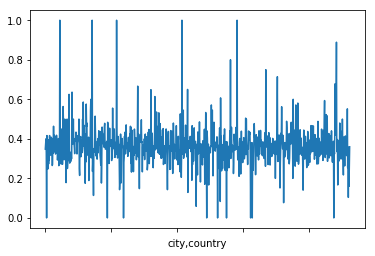

In [57]:
random_country = test_user.groupby(['city', 'country'])['test'].mean()
random_country.plot(kind='line')

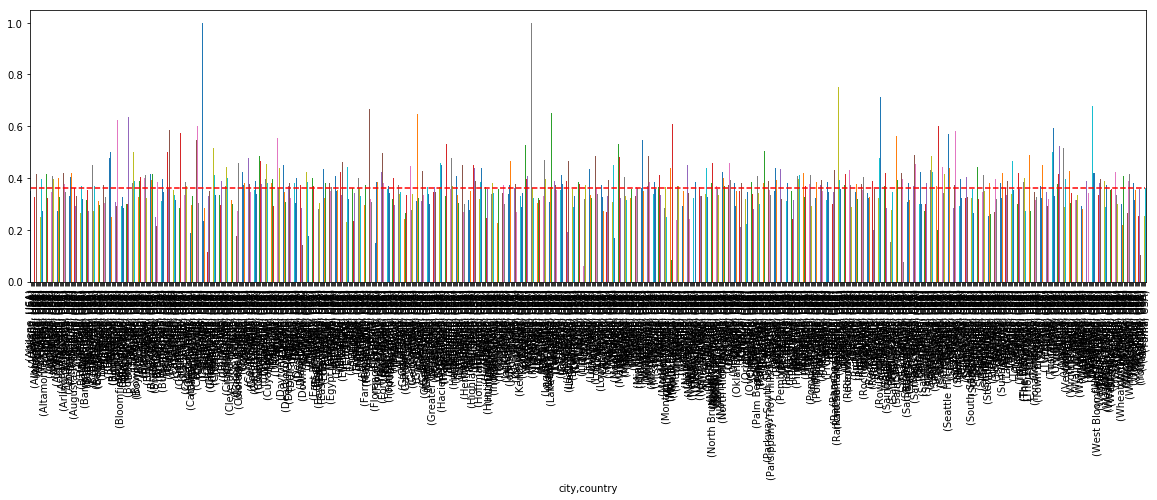

In [54]:
random_country = test_user.groupby(['city', 'country'])['test'].mean()
random_country.plot(kind='bar',figsize=(20, 5))
plt.plot([0.36]*len(random_country), '--r')
# random_country[(random_country < 0.22) | (random_country > 0.44)]

In [55]:
random_country = test_user.groupby(['city', 'country'])['test'].agg(['mean', 'size'])
random_country[(random_country['mean'] < 0.2) | (random_country['mean'] > 0.6)]

,,mean,size
city,country,,
Albuquerque,USA,0.000000,3
Baltimore,USA,1.000000,3
Berwyn,USA,0.178571,28
Blacksburg,USA,0.625000,8
Bonita Springs,USA,0.636364,11
Carmel,USA,0.175000,40
Castro Valley,USA,0.189189,74
Ceres,USA,0.650000,20
Cerritos,USA,1.000000,1


In [56]:
random_country[(random_country['mean'] < 0.4) & (random_country['mean'] > 0.3)].sort_values(by='size')

,,mean,size
city,country,,
Monroe,USA,0.333333,9
Montebello,USA,0.357143,14
Glenview,USA,0.312500,16
Parkway-South Sacramento,USA,0.352941,17
Hilo,USA,0.388889,18
Casper,USA,0.315789,19
Edmonds,USA,0.350000,20
Fishers,USA,0.318182,22
Coppell,USA,0.347826,23


similarly, the large or small proportions of the test samples mainly happen in the user segmentations with small sizes.

The user distribution is not completely random, however the total number of users in those segmentations is small.  
### The question is: should we trust this A/B testing result?

## t-test: 39 or 59

In [58]:
test_user['user_paid'] = test_user['price'] * test_user['converted']
test_user.head(10)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,user_paid
0,604839,2015-05-08,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0
1,624057,2015-05-10,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0
2,317970,2015-04-04,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0
3,820854,2015-05-24,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0
4,169971,2015-04-13,ads-google,mobile,iOS,0,39,0,New York,USA,40.67,-73.94,0
5,600150,2015-03-04,seo_facebook,web,windows,0,39,0,NaN,NaN,NaN,NaN,0
6,590182,2015-04-17,ads-google,web,windows,0,39,0,Bloomfield Township,USA,42.58,-83.27,0
7,606479,2015-05-15,direct_traffic,web,mac,0,39,0,Des Plaines,USA,42.03,-87.90,0
8,425567,2015-04-24,ads_facebook,web,windows,0,39,0,NaN,NaN,NaN,NaN,0
9,460593,2015-03-21,friend_referral,mobile,iOS,0,39,1,Hampton,USA,37.05,-76.29,39


In [98]:
test_user.groupby(['test'])['converted'].mean()

test
0    0.019900
1    0.015555
Name: converted, dtype: float64

The conversion rate is defined as # of converted users / # of total users in the group.
The conversion rate is smaller in the test group.  
However, we mainly care about revenue the users create. so below we check the average revenue.

In [59]:
test_user.groupby(['test'])['user_paid'].mean()

test
0    0.776083
1    0.917748
Name: user_paid, dtype: float64

Though the conversion rate is low for the test group, the price is higher. After combining the conversion rate and price, we notice from the above calculation that the average revenue contributed from every user is actually higher.  

Below we run a t-test to check the significance of this difference.

### the average revenue is ~0.776 in the control group and ~0.918 in the test group.

In [99]:
# a simple t-test here should work.

from scipy import stats

In [100]:
# t-test of test vs control for our target metric

ttest = stats.ttest_ind(
    test_user[test_user['test'] == 1]['user_paid'],
    test_user[test_user['test'] == 0]['user_paid'],
    equal_var = False
)
ttest

Ttest_indResult(statistic=5.715224666463108, pvalue=1.0972577312420781e-08)

t-test result indicates p_value = 1.1e-08 << threshold 0.05. So the difference is statistically significant.

## user behavior analysis

### focusing on revenue

In [109]:
test_user.groupby(['timestamp', 'test'])['user_paid'].agg(['mean']).head(10)

mean
timestamp  test          
2015-03-02 0     0.694362
           1     0.918685
2015-03-03 0     0.892157
           1     0.612457
2015-03-04 0     1.147059
           1     0.767896
2015-03-05 0     1.015855
           1     1.352436
2015-03-06 0     0.720339
           1     0.976520

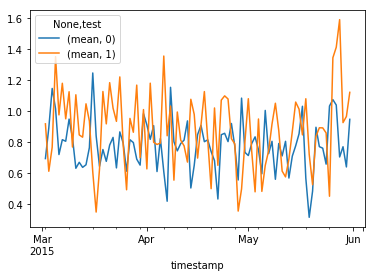

In [110]:
test_user.groupby(['timestamp', 'test'])['user_paid'].agg(['mean']).unstack().plot()

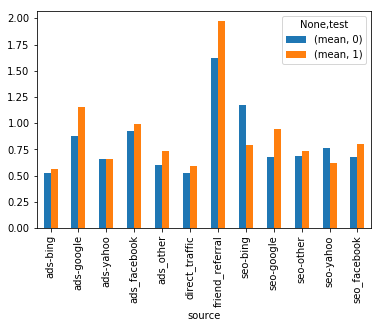

In [111]:
test_user.groupby(['source', 'test'])['user_paid'].agg(['mean']).unstack().plot(kind='bar')

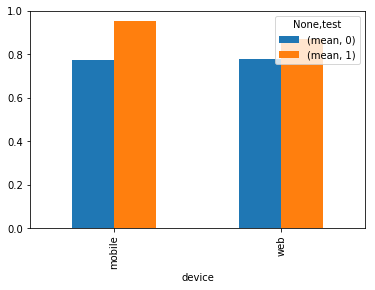

In [112]:
test_user.groupby(['device', 'test'])['user_paid'].agg(['mean']).unstack().plot(kind='bar')

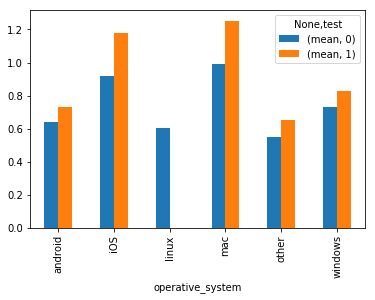

In [113]:
test_user.groupby(['operative_system', 'test'])['user_paid'].agg(['mean']).unstack().plot(kind='bar')

### focusing on conversion rate

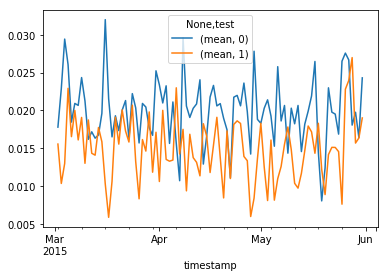

In [114]:
test_user.groupby(['timestamp','test'])['converted'].agg(['mean']).unstack().plot()

+ higher price leads to lower conversion rate.

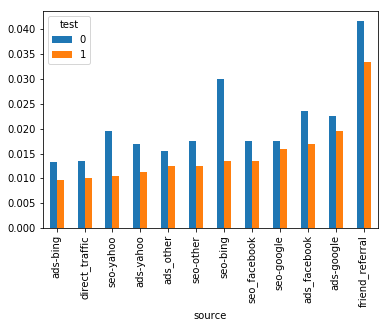

In [122]:
test_user.groupby(['source','test'])['converted'].agg(['mean']).unstack()['mean'].sort_values(by=1).plot(kind='bar')

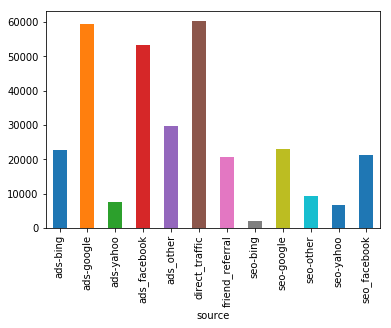

In [123]:
test.groupby(['source']).size().plot(kind='bar')

friend_referral, ads_google, and ads_facebook achieve first three highest conversion rates.  
+ ads_google and ads_facebook already have a large user base.  
+ If we want to increase the conversion rate further in these two groups, more personalized and higher quality ads should be designed. However, the recommendation algorithm and search engine are controlled by google or facebook, these maybe hard to change for the company.  
+ From another point, it would be wise to increase the users from the friend_referal path. Following this idea, the company can launch some activities with some rewords/discount/other benefits, which can incentivize more users to refer friends to the company website.

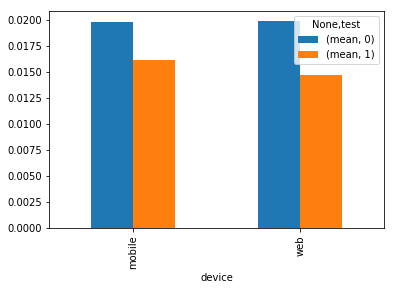

In [116]:
test_user.groupby(['device','test'])['converted'].agg(['mean']).unstack().plot(kind='bar')

mobile users have a slightly higher conversion rate than the web users.  
maybe optimizing user experiences on purchasing can help improve the conversion rate.

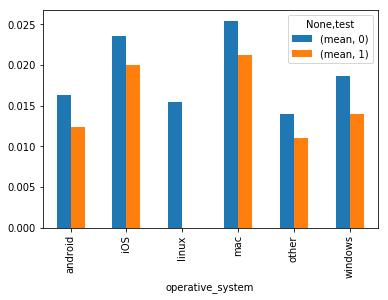

In [117]:
test_user.groupby(['operative_system','test'])['converted'].agg(['mean']).unstack().plot(kind='bar')

+ ios and mac users have slightly higher conversion rates. This indicates if the company can offer sale promotions to the ios and mac users, more users are possible to make purchases which results in a higher conversion rate.
+ Compared to ios and mac users, android and windows users have slightly lower conversion rates. If possible, it would helpful to figure out the reasons for this difference from the user feedbacks of both ios/mac and android/windows users.
+ one strange thing is that for the linux users, when the price is \$39, the conversion rate is 1.5\%, however, when the price is \$59, the conversion rate is exactly 0. This indicates no user purchases the \$59 version software. 

There could be several reasons for the situation of linux users:
+ there are replacements for the software but with a cheaper price.
+ there maybe some mistakes in the record.
+ there maybe some mistakes on the website to purchase the software for the test users.
+ there maybe some bugs for the software of linux version for the test users.

In [118]:
test_user.groupby(['operative_system','test'])['converted'].agg(['mean']).unstack()

mean          
test                     0         1
operative_system                    
android           0.016336  0.012363
iOS               0.023595  0.019994
linux             0.015426  0.000000
mac               0.025451  0.021240
other             0.014025  0.011060
windows           0.018704  0.014009

In [119]:
test_user[test_user['operative_system'] == 'linux']['test'].agg(['size', 'sum'])

size    4130
sum     1926
Name: test, dtype: int64

## Anwser to question 2:  
The VP of Product is interested in having __a holistic view into user behavior__, especially focusing on __actionable insights__ that might increase conversion rate. What are your main ﬁndings looking at the data? 

The point here is to increase conversion rate.  
#### price
+ a higher price leads to lower conversion rate.
+ but a higher price creates a higher average revenue per user.

#### friend_referral, ads_google, and ads_facebook achieve first three highest conversion rates.  
+ ads_google and ads_facebook already have a large user base.  
+ If we want to increase the conversion rate further in these two groups, more personalized and higher quality ads should be designed. However, the recommendation algorithm and search engine are controlled by google or facebook, these maybe hard to change for the company.  
+ From another point, it would be wise to increase the users from the friend_referal path. Following this idea, the company can launch some activities with some rewords/discount/other benefits, which can incentivize more users to refer friends to the company website.

#### device
mobile users have a slightly higher conversion rate than the web users.  
maybe optimizing user experiences on purchasing can help improve the conversion rate.

#### operative system
+ ios and mac users have slightly higher conversion rates. This indicates if the company can offer sale promotions to the ios and mac users, more users are possible to make purchases which results in a higher conversion rate.
+ Compared to ios and mac users, android and windows users have slightly lower conversion rates. If possible, it would helpful to figure out the reasons for this difference from the user feedbacks of both ios/mac and android/windows users.
+ one strange thing is that for the linux users, when the price is \$39, the conversion rate is 1.5\%, however, when the price is \$59, the conversion rate is exactly 0. This indicates no user purchases the \$59 version software. If the company could figure out the reason and acquire linux users to purchase the software of \$59, the conversion rate would increase.

There could be several reasons for the situation of linux users:
+ there are replacements for the software but with a cheaper price.
+ there maybe some mistakes in the record.
+ there maybe some mistakes on the website to purchase the software for the test users.
+ there maybe some bugs for the software of linux version for the test users.



In [121]:
test_user.groupby(['city','test'])['converted'].agg(['mean']).unstack()['mean'].sort_values(by=1, ascending=False).head()

test,0,1
city,,
North Atlanta,0.000000,0.250000
Lehigh Acres,0.000000,0.210526
Chapel Hill,0.000000,0.200000
Findlay,0.000000,0.166667
Blue Springs,0.066667,0.166667


## One more question: 
+ what's the relation between city (or locations) and conversion rate?

## After how many days would you have stopped the test?

general idea:  
1. sample size estimate
2. number of new users everyday

In [124]:
users_everyday = test_user.groupby(['timestamp', 'test']).size().unstack()
users_everyday.head()

test,0,1
timestamp,,
2015-03-02,1011,578
2015-03-03,918,578
2015-03-04,952,461
2015-03-05,1766,1047
2015-03-06,4602,2598


In [125]:
users_everyday['cumsum_0'] = users_everyday[0].cumsum()
users_everyday['cumsum_1'] = users_everyday[1].cumsum()
users_everyday['cum_sum_tot'] = users_everyday['cumsum_0'] + users_everyday['cumsum_1']
users_everyday.head()

test,0,1,cumsum_0,cumsum_1,cum_sum_tot
timestamp,,,,,
2015-03-02,1011,578,1011,578,1589
2015-03-03,918,578,1929,1156,3085
2015-03-04,952,461,2881,1617,4498
2015-03-05,1766,1047,4647,2664,7311
2015-03-06,4602,2598,9249,5262,14511


+ This table contains information about daily visitor numbers in the control and test groups.  
+ It also has cumulative counts for the two groups.
+ A cumulative total visitor number is also included.

In [132]:
import statsmodels.stats.api as sms

In [168]:
p1_and_p2 = sms.proportion_effectsize(0.02, 0.024)
sample_size_upper = sms.NormalIndPower().solve_power(p1_and_p2, power = 0.8, alpha = 0.05)
sample_size_upper

21066.437206055296

In [169]:
p1_and_p2 = sms.proportion_effectsize(0.02, 0.016)
sample_size_lower = sms.NormalIndPower().solve_power(p1_and_p2, power = 0.8, alpha = 0.05)
sample_size_lower

17289.002339273073

The conversion rate for the old price is ~ 0.02. According to the analysis in the section __"t-test: 39 or 59"__, we check the sample size we need to detect 0.005 change to the conversion rate.
+ to detect that the conversion rate increase by 0.005, the sample size should be 21067.
+ to detect that the conversion rate decrease by 0.005, the sample size should be 17290.

In [170]:
sample_size = max(sample_size_upper, sample_size_lower)

In [171]:
AB_running = users_everyday[users_everyday['cumsum_1'] > sample_size]
AB_running.head()

test,0,1,cumsum_0,cumsum_1,cum_sum_tot
timestamp,,,,,
2015-03-20,4612,2634,40743,22632,63375
2015-03-21,3692,2092,44435,24724,69159
2015-03-22,2722,1504,47157,26228,73385
2015-03-23,984,505,48141,26733,74874
2015-03-24,945,483,49086,27216,76302


This test gets a sufficient test group size until 2015-03-20.

## what do we learn from the data with a new early end date?

In [172]:
test_user.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,user_paid
0,604839,2015-05-08,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0
1,624057,2015-05-10,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0
2,317970,2015-04-04,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0
3,820854,2015-05-24,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0
4,169971,2015-04-13,ads-google,mobile,iOS,0,39,0,New York,USA,40.67,-73.94,0


In [174]:
AB_end_date = max(test_user['timestamp'].min() + pd.Timedelta(days=21), AB_running.index.min())
AB_end_date

Timestamp('2015-03-23 00:00:00')

An end date is selected so that the total time period would be about three weeks. Containing multiple weeks of data would be helpful to discover some user behavior related to the time factor.

In [180]:
test_user_short_term = test_user[test_user['timestamp'] < AB_end_date]
test_user_short_term.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,user_paid
5,600150,2015-03-04,seo_facebook,web,windows,0,39,0,NaN,NaN,NaN,NaN,0
9,460593,2015-03-21,friend_referral,mobile,iOS,0,39,1,Hampton,USA,37.05,-76.29,39
11,444108,2015-03-16,seo-google,web,mac,0,39,0,Milwaukee,USA,43.06,-87.97,0
12,692331,2015-03-08,ads-google,mobile,iOS,0,39,0,Deerfield Beach,USA,26.31,-80.12,0
13,817127,2015-03-04,ads_facebook,mobile,iOS,0,39,0,Sheboygan,USA,43.75,-87.73,0


In [181]:
test_user_short_term.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73385 entries, 5 to 316434
Data columns (total 13 columns):
user_id             73385 non-null int64
timestamp           73385 non-null datetime64[ns]
source              73385 non-null object
device              73385 non-null object
operative_system    73385 non-null object
test                73385 non-null int64
price               73385 non-null int64
converted           73385 non-null int64
city                63836 non-null object
country             63836 non-null object
lat                 63836 non-null float64
long                63836 non-null float64
user_paid           73385 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 7.8+ MB


In [182]:
test_user_short_term.groupby(['test'])['converted'].mean()

test
0    0.019658
1    0.016471
Name: converted, dtype: float64

the conversion rate is lower for the expensive version.

In [178]:
test_user_short_term.groupby(['test'])['user_paid'].mean()

test
0    0.766652
1    0.971786
Name: user_paid, dtype: float64

the average revenue contribution is higher for the expensive version.

In [179]:
# t-test of test vs control for our target metric

ttest = stats.ttest_ind(
    test_user_short_term[test_user_short_term['test'] == 1]['user_paid'],
    test_user_short_term[test_user_short_term['test'] == 0]['user_paid'],
    equal_var = False
)
ttest

Ttest_indResult(statistic=3.8964088054307253, pvalue=9.778212403922973e-05)

t-test is used to check the significance. P-value is ~ 1e-4 << 0.05. This indicates the change is significant.

## Answer to question 3

The VP of Product's intuition is right in some sense according to the above analysis. The test had run for 91 days. But the data shows a time period of 21 days is enough to see changes with significances. So that we can save cost of additional 70 days.